# 1. Introdução

##**1.1. Objetivo da análise**

1. Realizar a limpeza da base.

2. Analisar os dados, identificar insights e propor ações baseadas nos dados.

# 2. Configuração do ambiente

In [3]:
# Primeiro, eu importo as bibliotecas que vou usar:
# pandas para manipular dados, numpy para cálculos numéricos,
# matplotlib para gráficos e sys para mapear informações do sistema.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [4]:
# URL do arquivo xlsx do GitHub
url = "https://raw.githubusercontent.com/wanderley-93/analise-varejo/main/base_de_dados_varejo.xlsx"

# Ler todas as planilhas do arquivo Excel
# pd.read_excel: função da biblioteca pandas para ler arquivos Excel
# sheet_name é um parâmetro da função que define qual aba ler:
#   - sheet_name='NomeDaAba' → lê apenas essa aba
#   - sheet_name=0 → lê a primeira aba
#   - sheet_name=[0, 2] → lê várias abas, passando uma lista de índices ou nomes
#   - sheet_name=None → lê todas as abas de uma vez (retorna um dicionário: chave = nome da aba, valor = DataFrame)
xls = pd.read_excel(url, sheet_name=None)

# Listar os nomes das planilhas
# xls.keys() retorna todas as chaves do dicionário (ou seja, os nomes das abas)
# list() transforma essas chaves em uma lista comum
nomes_abas = list(xls.keys())

# Imprimir os nomes das abas
print("O arquivo possui as seguintes abas:", nomes_abas)

# Resumo:
# 1. Definimos a URL do arquivo Excel online.
# 2. Usamos pd.read_excel() para ler o arquivo.
# 3. O parâmetro sheet_name indica qual aba queremos:
#    se None, pega todas as abas de uma vez (retorna um dicionário).
# 4. Cada aba vira uma chave no dicionário, com seus dados dentro.
# 5. Pegamos os nomes das abas e imprimimos na tela.
# Em resumo: isso permite descobrir quais planilhas o Excel tem sem abrir manualmente.


O arquivo possui as seguintes abas: ['Raw', 'Master Produto', 'Master Lojas', 'Master clientes']


# 3. Limpeza e preparação dos dados

##3.1. Limpeza de espaços em branco

In [5]:
# Eu carrego os dados da planilha principal
# pd.read_excel(url, sheet_name=0) lê apenas a primeira aba (sheet_name=0)
# O resultado é um DataFrame, que é como uma tabela do Excel dentro do Python
df_raw = pd.read_excel(url, sheet_name=0)
# print(df_raw.head()) mostra as 5 primeiras linhas da tabela para ver os dados rapidamente
print("\n", df_raw.head())

# Dados de produtos
# Lendo a segunda aba (sheet_name=1) do Excel
df_produto = pd.read_excel(url, sheet_name=1)
# Mostra as 5 primeiras linhas da tabela de produtos
print("\n", df_produto.head())

# Dados das lojas
# Lendo a terceira aba (sheet_name=2)
df_lojas = pd.read_excel(url, sheet_name=2)
# Mostra as 5 primeiras linhas da tabela de lojas
print("\n", df_lojas.head())

# Dados dos clientes
# Lendo a quarta aba (sheet_name=3)
df_clientes = pd.read_excel(url, sheet_name=3)
# Mostra as 5 primeiras linhas da tabela de clientes
print("\n", df_clientes.head())

# Resumo:
# 1. Aqui estamos lendo abas específicas do Excel usando pd.read_excel() e sheet_name.
#    Cada número no sheet_name indica a posição da aba (0 = primeira, 1 = segunda, etc.).
# 2. Cada aba lida vira um DataFrame, que é como uma tabela do Excel dentro do Python.
# 3. Usamos df.head() para ver rapidamente as primeiras 5 linhas de cada tabela.
# 4. Em resumo: você carregou várias abas do Excel em tabelas separadas no Python, prontas para análise.



    TransactionID       Date  LojaID  ProdutoID  ClienteID  UnidadesVendidas  \
0              1 2022-01-01       7     246110     180046                 2   
1              2 2022-01-01       9     246108     180184                 1   
2              3 2022-01-01       1     246102     180054                 2   
3              4 2022-01-01       3     246102     180194                 2   
4              5 2022-01-01       4     246108     180178                 2   

   ValorVendido  Promo  
0         99.98      0  
1         35.99      0  
2         51.98      0  
3         51.98      0  
4         71.98      0  

    ProdutoID  Descrição                       Categoria Tamano  \
0     246100        NaN                  Calças & Saias      P   
1     246102        NaN                Blusas & Camisas      G   
2     246104        NaN                  Calças & Saias      M   
3     246106        NaN                Blusas & Camisas      M   
4     246108        NaN                Bl

In [6]:
# Carreguei todas as colunas de texto do df_produto
print("df_produto: \n\n", df_produto.head(),"\n\n")

df_produto.info()

# select_dtypes(include=['object']) seleciona apenas as colunas que têm texto (tipo object)
colunas_texto = df_produto.select_dtypes(include=['object']).columns

# Identifiquei linhas que tinham espaço no início ou fim do texto
# .apply(lambda x: x.str.startswith(" ") | x.str.endswith(" ")) verifica cada célula de cada coluna de texto
# Retorna True se houver espaço no começo ou no final
mask = df_produto[colunas_texto].apply(lambda x: x.str.startswith(" ") | x.str.endswith(" "))

# Mostrei apenas as linhas que apresentavam esse problema
# mask.any(axis=1) retorna True para qualquer linha que tenha pelo menos um problema
df_espacos = df_produto[mask.any(axis=1)]

# Removi os espaços no início e fim de todas as colunas de texto
# .str.strip() tira espaços extras no começo e no final do texto
df_produto[colunas_texto] = df_produto[colunas_texto].apply(lambda x: x.str.strip())

# df_produto agora está limpo, sem espaços extras no começo ou fim das células de texto
print("\n\n Aqui está o df_produto corrigido: \n\n", df_produto.head())


# Resumo para quem está aprendendo Python:
# 1. Primeiro selecionamos todas as colunas de texto da tabela de produtos.
# 2. Depois verificamos se alguma célula tinha espaço extra no início ou no final.
# 3. Criamos uma tabela separada (df_espacos) só com as linhas que tinham esse problema.
# 4. Em seguida, usamos .str.strip() para remover todos os espaços extras das colunas de texto.
# 5. No final, df_produto fica "limpo", pronto para análise, sem espaços desnecessários que poderiam atrapalhar.


df_produto: 

    ProdutoID  Descrição                       Categoria Tamano  \
0     246100        NaN                  Calças & Saias      P   
1     246102        NaN                Blusas & Camisas      G   
2     246104        NaN                  Calças & Saias      M   
3     246106        NaN                Blusas & Camisas      M   
4     246108        NaN                Blusas & Camisas      M   

                    Cor  
0              Vermelho  
1               Amarelo  
2                Branco  
3                 Preto  
4               Amarelo   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProdutoID  12 non-null     int64  
 1   Descrição  0 non-null      float64
 2   Categoria  12 non-null     object 
 3   Tamano     12 non-null     object 
 4   Cor        12 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory 

##3.2. Padronizando dados de lojas sem UF

In [7]:
# Mostrar a tabela completa de lojas
print("df_lojas: \n\n", df_lojas)

# Identifiquei linhas que tinham algum valor nulo na coluna UF
# .isnull() retorna True para células vazias (NaN)
linhas_com_nulos = df_lojas[df_lojas['UF'].isnull()]

print("\n\n Linhas com valores nulos: \n\n", linhas_com_nulos)

# Criei coluna temporária mostrando qual UF poderia preencher os nulos
# Copiamos as linhas com nulos para não mexer no df original ainda
enriquecimento = linhas_com_nulos.copy()
# Para cada CidadeID, buscamos a UF existente em outra linha que tenha o mesmo código
enriquecimento['UF_existente'] = enriquecimento['CidadeID'].apply(
    lambda cod: df_lojas[(df_lojas['CidadeID'] == cod) & df_lojas['UF'].notnull()]['UF'].iloc[0]
    if not df_lojas[(df_lojas['CidadeID'] == cod) & df_lojas['UF'].notnull()].empty else None
)

print("\n\n Linhas com valores nulos identificados: \n\n", enriquecimento)


# Criei um dicionário mapeando CodigoCidade para UF_existente
# dict(zip(...)) cria pares CidadeID → UF que será usado para preencher os nulos
mapa_cod_uf = dict(zip(enriquecimento["CidadeID"], enriquecimento["UF_existente"]))

print("\n\n Dicionário com valores nulos identificados: \n\n", mapa_cod_uf)


# Preenchi valores nulos de UF usando o dicionário
# .apply() percorre cada linha; se UF estiver nulo, substitui pelo valor do dicionário
df_lojas["UF"] = df_lojas.apply(
    lambda row: mapa_cod_uf.get(row["CidadeID"], row["UF"]) if pd.isnull(row["UF"]) else row["UF"],
    axis=1
)

# df_lojas agora tem a coluna UF preenchida
print("\n\ndf_lojas depois do enriquecimento: \n\n", df_lojas)

# Resumo para quem está aprendendo Python:
# 1. Primeiro mostramos a tabela de lojas e identificamos linhas que tinham UF vazio.
# 2. Criamos uma tabela temporária só com essas linhas e tentamos "adivinhar" o UF correto usando o Código da Cidade.
# 3. Para cada CidadeID, buscamos em outras linhas da tabela a UF já preenchida.
# 4. Criamos um dicionário mapeando CidadeID → UF para facilitar o preenchimento.
# 5. Aplicamos esse mapeamento na tabela original, preenchendo os valores nulos.
# 6. Em resumo: usamos dados existentes da tabela para preencher informações faltantes de forma automática.


df_lojas: 

    LojaID  CidadeID   UF    Regiao
0       1     80041   BA  NORDESTE
1       2     80041   BA  NORDESTE
2       3     80041  NaN  NORDESTE
3       4     80041   BA  NORDESTE
4       5     55736   SP   SUDESTE
5       6     55736   SP   SUDESTE
6       7     55736  NaN   SUDESTE
7       8     55736   SP   SUDESTE
8       9     33005   MG   SUDESTE
9      10     33005   MG   SUDESTE


 Linhas com valores nulos: 

    LojaID  CidadeID   UF    Regiao
2       3     80041  NaN  NORDESTE
6       7     55736  NaN   SUDESTE


 Linhas com valores nulos identificados: 

    LojaID  CidadeID   UF    Regiao UF_existente
2       3     80041  NaN  NORDESTE           BA
6       7     55736  NaN   SUDESTE           SP


 Dicionário com valores nulos identificados: 

 {80041: 'BA', 55736: 'SP'}


df_lojas depois do enriquecimento: 

    LojaID  CidadeID  UF    Regiao
0       1     80041  BA  NORDESTE
1       2     80041  BA  NORDESTE
2       3     80041  BA  NORDESTE
3       4     80041  B

##3.3. Clientes sem classe social definida

In [8]:
print("df_clientes com classes sociais em branco: \n\n", df_clientes)

# Preenchi valores ausentes e limpei espaços em branco da coluna ClasseSocial
df_clientes['ClasseSocial'] = (
    df_clientes['ClasseSocial']
    .fillna('N/D')        # Substitui valores nulos (NaN) por 'N/D'
    .replace('', 'N/D')   # Substitui strings vazias por 'N/D'
    .str.strip()          # Remove espaços extras no início ou fim do texto
)

# Agrupei clientes por ClasseSocial e contei quantos há em cada grupo
# groupby('ClasseSocial') cria grupos de clientes com a mesma classe social
# ['ClienteID'].count() conta quantos clientes tem em cada grupo
# reset_index() transforma o resultado em uma tabela organizada
clientes_por_classe = df_clientes.groupby('ClasseSocial')['ClienteID'].count().reset_index()



# Renomeei a coluna de contagem para QuantidadeClientes
clientes_por_classe.rename(columns={'ClienteID': 'QuantidadeClientes'}, inplace=True)


print("\n\ndf_clientes com classes sociais em branco: \n\n", clientes_por_classe)


# df_clientes atualizado permanece com a coluna ClasseSocial limpa
print("\n\ndf_clientes com classes sociais em branco: \n\n", df_clientes)


# Resumo para quem está aprendendo Python:
# 1. Primeiro limpamos a coluna 'ClasseSocial', substituindo nulos e strings vazias por 'N/D' e removendo espaços extras.
# 2. Depois agrupamos os clientes por classe social para ver quantos clientes há em cada grupo.
# 3. Contamos os clientes usando .count() e organizamos o resultado como uma tabela com reset_index().
# 4. Renomeamos a coluna de contagem para 'QuantidadeClientes' para ficar mais claro.
# 5. Em resumo: limpezamos os dados e criamos um resumo mostrando quantos clientes existem em cada classe social.


df_clientes com classes sociais em branco: 

     ClienteID Genero Faixa de Idade ClasseSocial
0      180000      F          35-45          NaN
1      180002      F            45+            D
2      180004      F          18-25            C
3      180006      F            45+            C
4      180008      F          35-45            C
..        ...    ...            ...          ...
95     180190      M          18-25            C
96     180192      M          18-25            A
97     180194      M            45+            C
98     180196      X          25-35            C
99     180198      F          25-35            E

[100 rows x 4 columns]


df_clientes com classes sociais em branco: 

   ClasseSocial  QuantidadeClientes
0            A                  11
1            B                  12
2            C                  47
3            D                  15
4            E                  10
5          N/D                   5


df_clientes com classes sociais em branco: 

  

##3.4. Alimentação da coluna **descrição** e ajuste de erro ortográfico na coluna **tamanho**

In [9]:
print("\n\ndf_produto com nome da coluna Tamanho errada: \n\n", df_produto)

# Corrigi o nome da coluna de 'Tamano' para 'Tamanho'
# rename(columns={...}, inplace=True) permite renomear colunas no DataFrame
# inplace=True significa que a mudança acontece direto no df_produto, sem precisar criar outro DataFrame
df_produto.rename(columns={'Tamano': 'Tamanho'}, inplace=True)

print("\n\ndf_produto com a coluna Tamanho corrigida: \n\n", df_produto)


# Combinei as colunas Cor e Tamanho na coluna Descrição
# .astype(str) transforma os valores em texto, caso não sejam strings
# O símbolo + concatena (junta) os textos, com " - " no meio
df_produto["Descrição"] = df_produto["Cor"].astype(str) + " - " + df_produto["Tamanho"].astype(str)

# df_produto atualizado agora tem a coluna 'Tamanho' corrigida e a nova coluna 'Descrição'
print("\n\ndf_produto com a coluna descrição preenchida com a concatenação dos valores das colunas Cor e Tamanho: \n\n", df_produto)


# Resumo para quem está aprendendo Python:
# 1. Primeiro renomeamos a coluna 'Tamano' para 'Tamanho', corrigindo um erro de digitação.
# 2. Depois criamos uma nova coluna 'Descrição', combinando a cor e o tamanho do produto em uma única célula.
# 3. Isso é útil para ter uma descrição completa do produto sem precisar olhar duas colunas separadas.
# 4. Em resumo: renomeamos para clareza e combinamos informações para facilitar a análise.




df_produto com nome da coluna Tamanho errada: 

     ProdutoID  Descrição         Categoria Tamano       Cor
0      246100        NaN    Calças & Saias      P  Vermelho
1      246102        NaN  Blusas & Camisas      G   Amarelo
2      246104        NaN    Calças & Saias      M    Branco
3      246106        NaN  Blusas & Camisas      M     Preto
4      246108        NaN  Blusas & Camisas      M   Amarelo
5      246110        NaN  Blusas & Camisas      P   Amarelo
6      246112        NaN    Calças & Saias      P    Branco
7      246114        NaN  Blusas & Camisas      P     Preto
8      246116        NaN  Blusas & Camisas      G     Preto
9      246118        NaN  Blusas & Camisas     GG     Preto
10     246120        NaN    Calças & Saias      G  Vermelho
11     246122        NaN    Calças & Saias      M  Vermelho


df_produto com a coluna Tamanho corrigida: 

     ProdutoID  Descrição         Categoria Tamanho       Cor
0      246100        NaN    Calças & Saias       P  Vermelho

# 4. Visão consolidada

In [10]:
# Fiz merge das tabelas usando suas chaves primárias
# pd.merge() combina duas tabelas (DataFrames) com base em uma coluna em comum
# on='ClienteID' indica que a junção será feita usando essa coluna
# how='left' significa que vamos manter todas as linhas da tabela da esquerda
df_raw_clientes = pd.merge(df_raw, df_clientes, on='ClienteID', how='left')

# Agora juntamos df_raw_clientes com a tabela de lojas usando LojaID
df_raw_clientes_loja = pd.merge(df_raw_clientes, df_lojas, on='LojaID', how='left')

# Finalmente juntamos o resultado com a tabela de produtos usando ProdutoID
df_raw_fim = pd.merge(df_raw_clientes_loja, df_produto, on='ProdutoID', how='left')

# Visualizei a visão consolidada que será usada na análise
df_raw_fim

# Resumo para quem está aprendendo Python:
# 1. Aqui estamos combinando várias tabelas em uma só para ter todas as informações em um único lugar.
# 2. Usamos pd.merge() para juntar as tabelas com base nas chaves: ClienteID, LojaID e ProdutoID.
# 3. O parâmetro how='left' garante que não perderemos registros da tabela principal (a primeira passada no merge).
# 4. No final, df_raw_fim é a tabela consolidada que contém informações de clientes, lojas e produtos.
# 5. Em resumo: fizemos um “super DataFrame” unindo todos os dados que vamos analisar depois.

,TransactionID,Date,LojaID,ProdutoID,ClienteID,UnidadesVendidas,ValorVendido,Promo,Genero,Faixa de Idade,ClasseSocial,CidadeID,UF,Regiao,Descrição,Categoria,Tamanho,Cor
0,1,2022-01-01,7,246110,180046,2,99.98,0,M,35-45,C,55736,SP,SUDESTE,Amarelo - P,Blusas & Camisas,P,Amarelo
1,2,2022-01-01,9,246108,180184,1,35.99,0,M,35-45,C,33005,MG,SUDESTE,Amarelo - M,Blusas & Camisas,M,Amarelo
2,3,2022-01-01,1,246102,180054,2,51.98,0,M,25-35,C,80041,BA,NORDESTE,Amarelo - G,Blusas & Camisas,G,Amarelo
3,4,2022-01-01,3,246102,180194,2,51.98,0,M,45+,C,80041,BA,NORDESTE,Amarelo - G,Blusas & Camisas,G,Amarelo
4,5,2022-01-01,4,246108,180178,2,71.98,0,M,18-25,C,80041,BA,NORDESTE,Amarelo - M,Blusas & Camisas,M,Amarelo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,12904,2023-09-30,6,246104,180080,2,55.98,0,F,25-35,D,55736,SP,SUDESTE,Branco - M,Calças & Saias,M,Branco
7781,12905,2023-09-30,8,246118,180054,2,179.98,0,M,25-35,C,55736,SP,SUDESTE,Preto - GG,Blusas & Camisas,GG,Preto
7782,12906,2023-09-30,2,246112,180066,2,109.98,0,F,35-45,B,80041,BA,NORDESTE,Branco - P,Calças & Saias,P,Branco
7783,12907,2023-09-30,7,246120,180076,2,179.98,0,F,25-35,C,55736,SP,SUDESTE,Vermelho - G,Calças & Saias,G,Vermelho


# 5. Análise exploratória

##5.1. Estatísticas descritivas básicas
**Objetivo**: Entender o comportamento das unidades vendidas e valores das transações

In [11]:
# Analisei estatísticas descritivas das colunas UnidadesVendidas e ValorVendido
# df[['UnidadesVendidas','ValorVendido']] seleciona apenas essas duas colunas
# .describe() calcula estatísticas básicas de cada coluna numérica:
#   - count: quantidade de valores não nulos
#   - mean: média
#   - std: desvio padrão (quanto os valores variam da média)
#   - min e max: menor e maior valor
#   - 25%, 50%, 75%: os quartis (dividem os dados em 4 partes)
# .round(2) arredonda os números com 2 casas decimais para facilitar a leitura
df_raw_fim[['UnidadesVendidas','ValorVendido']].describe().round(2)

# Resumo para quem está aprendendo Python:
# 1. Selecionamos as colunas de interesse: unidades vendidas e valor vendido.
# 2. Usamos .describe() para ver rapidamente as estatísticas principais dessas colunas.
# 3. Isso ajuda a entender a distribuição dos dados, identificar valores muito altos ou baixos e ter uma visão geral.
# 4. Arredondamos os números para deixar a tabela mais limpa.
# 5. Em resumo: é um jeito rápido de conhecer os números antes de fazer análises mais detalhadas.

,UnidadesVendidas,ValorVendido
count,7785.00,7785.00
mean,2.38,118.01
std,0.88,74.11
min,1.00,16.99
25%,2.00,59.97
50%,2.00,93.48
75%,3.00,164.97
max,4.00,367.96


Em média, cada transação vende 2 unidades e fatura 118, com a mediana em 2 unidades e 93,48. A maioria das vendas segue esse padrão, mas algumas transações maiores elevam a média. Os valores variam de 1 a 4 unidades e de 16,99 a 367,96, mostrando a dispersão típica das vendas.

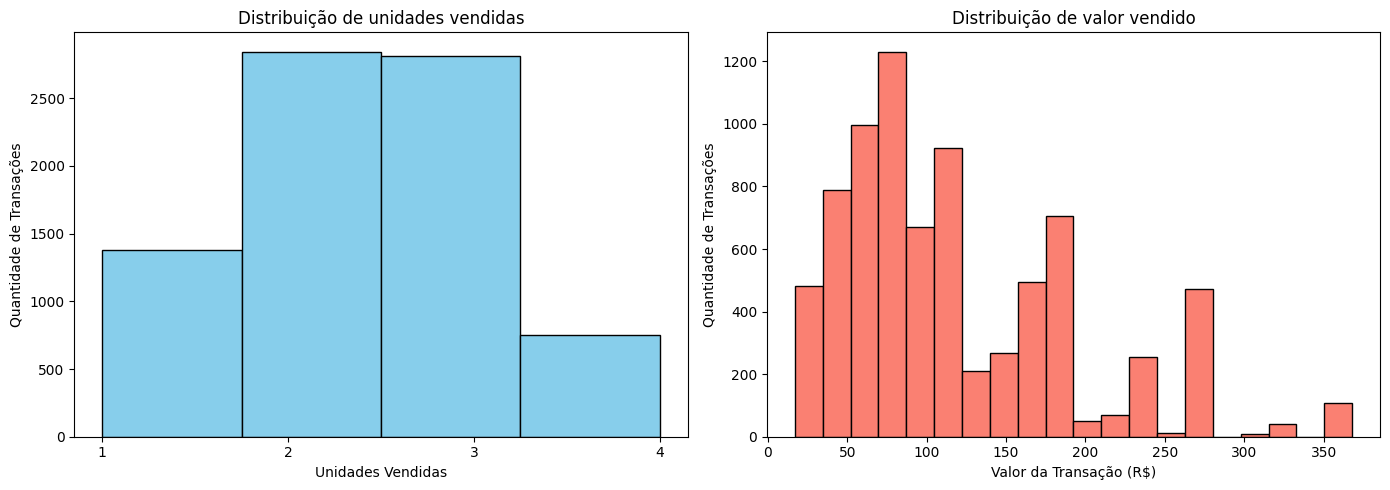

In [12]:
# Criei histogramas lado a lado para analisar a distribuição de UnidadesVendidas e ValorVendido
# plt.subplots(1, 2, figsize=(14,5)) cria uma figura com 1 linha e 2 gráficos (lado a lado)
# figsize define o tamanho da figura (14x5 polegadas)
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Analisei a distribuição de unidades vendidas
# axes[0].hist() cria o histograma da coluna UnidadesVendidas
# bins=4 significa dividir os valores em 4 faixas
# color e edgecolor definem as cores do gráfico
axes[0].hist(df_raw_fim['UnidadesVendidas'], bins=4, color='skyblue', edgecolor='black')
axes[0].set_title('Distribuição de unidades vendidas')   # título do gráfico
axes[0].set_xlabel('Unidades Vendidas')                 # rótulo do eixo X
axes[0].set_ylabel('Quantidade de Transações')          # rótulo do eixo Y
axes[0].set_xticks(range(1,5))                          # marcações no eixo X (1 a 4)

# Analisei a distribuição de valor vendido
# Mesma lógica, mas agora para a coluna ValorVendido
# bins=20 → mais divisões no gráfico, deixando a distribuição mais detalhada
axes[1].hist(df_raw_fim['ValorVendido'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Distribuição de valor vendido')
axes[1].set_xlabel('Valor da Transação (R$)')
axes[1].set_ylabel('Quantidade de Transações')

# Ajusta o espaçamento entre os gráficos para não ficarem sobrepostos
plt.tight_layout()
# Exibe os gráficos
plt.show()

# Resumo:
# 1. Criamos dois gráficos lado a lado (um para unidades vendidas e outro para valor vendido).
# 2. Cada gráfico é um histograma: mostra como os valores estão distribuídos em "faixas" (bins).
# 3. O histograma ajuda a ver se os dados estão concentrados em certos intervalos ou bem espalhados.
# 4. Configuramos títulos, rótulos e cores para deixar os gráficos claros e fáceis de interpretar.
# 5. Em resumo: esses gráficos mostram a frequência de vendas (quantas transações em cada faixa de valores/unidades).


##5.2. Análise do Perfil do cliente

**Objetivo**: Descobrir quais segmentos e clientes geram mais receita e unidades.

In [13]:
# Agrupei os dados por cliente e calculei métricas de resumo
clientes_resumo = (
    df_raw_fim.groupby('ClienteID')   # Agrupa os dados pelo cliente
    .agg(                             # .agg() permite calcular várias métricas ao mesmo tempo
        Total_Transacoes=('TransactionID','nunique'),   # Conta quantas transações únicas o cliente fez
        Faturamento_Total=('ValorVendido','sum'),       # Soma o valor total das vendas
        Ticket_Medio=('ValorVendido','mean'),           # Calcula a média do valor das compras (ticket médio)
        Unidades_Medias=('UnidadesVendidas','mean')     # Calcula a média de unidades vendidas por compra
    )
    .reset_index()                                      # Volta o índice normal para tabela organizada
    .sort_values(by='Faturamento_Total', ascending=False)  # Ordena do maior para o menor faturamento
)

# Visualização do resumo por cliente
clientes_resumo

# Resumo:
# 1. Agrupamos os dados pelo identificador do cliente (ClienteID).
# 2. Para cada cliente, calculamos:
#    - Total de transações feitas (quantidade de compras).
#    - Faturamento total (quanto ele gastou no total).
#    - Ticket médio (valor médio gasto por compra).
#    - Média de unidades compradas por transação.
# 3. Organizamos o resultado em formato de tabela e ordenamos pelos clientes que mais geraram faturamento.
# 4. Em resumo: criamos uma visão consolidada do comportamento de cada cliente para entender quem são os mais valiosos.

,ClienteID,Total_Transacoes,Faturamento_Total,Ticket_Medio,Unidades_Medias
89,180178,96,12361.2930,128.763469,2.427083
83,180166,99,12146.0685,122.687561,2.434343
27,180054,95,11486.8415,120.914121,2.515789
11,180022,98,11440.6340,116.741163,2.346939
80,180160,84,11319.8460,134.760071,2.476190
...,...,...,...,...,...
20,180040,50,6490.2050,129.804100,2.420000
14,180028,61,6466.7170,106.011754,2.327869
40,180080,62,6359.9985,102.580621,2.290323
0,180000,39,5295.2875,135.776603,2.384615


In [14]:
# Agrupei os dados por gênero, faixa etária e classe social, calculando métricas de resumo
segmentos_resumo = (
    df_raw_fim.groupby(['Genero','Faixa de Idade','ClasseSocial'])  # Cria grupos combinando essas 3 colunas
    .agg(                                                          # .agg() calcula várias métricas ao mesmo tempo
        Total_Transacoes=('TransactionID','nunique'),   # Conta quantas transações únicas existem em cada segmento
        Faturamento_Total=('ValorVendido','sum'),       # Soma o valor total vendido no segmento
        Ticket_Medio=('ValorVendido','mean'),           # Calcula o valor médio gasto por transação (ticket médio)
        Unidades_Medias=('UnidadesVendidas','mean')     # Calcula a média de unidades compradas por transação
    )
    .reset_index()                                      # Reorganiza o índice para virar tabela limpa
    .sort_values(by='Faturamento_Total', ascending=False)  # Ordena do maior para o menor faturamento
)

# Visualização do resumo por segmento
segmentos_resumo

# Resumo:
# 1. Aqui agrupamos os dados não por cliente, mas por perfil de segmento:
#    - Gênero
#    - Faixa de idade
#    - Classe social
# 2. Para cada combinação desses fatores, calculamos:
#    - Total de transações
#    - Faturamento total
#    - Ticket médio
#    - Média de unidades por compra
# 3. Organizamos os resultados em uma tabela e colocamos em ordem do maior para o menor faturamento.
# 4. Em resumo: criamos uma análise segmentada para entender quais perfis de clientes mais compram e geram valor.

,Genero,Faixa de Idade,ClasseSocial,Total_Transacoes,Faturamento_Total,Ticket_Medio,Unidades_Medias
6,F,25-35,C,1214,144711.1090,119.201902,2.355848
12,F,35-45,C,703,79934.9375,113.705459,2.371266
25,M,25-35,C,617,71755.1955,116.296913,2.377634
13,F,35-45,D,423,49259.9845,116.453864,2.373522
11,F,35-45,B,383,44405.6740,115.941708,2.383812
4,F,25-35,A,323,38151.6130,118.116449,2.399381
8,F,25-35,E,274,32968.4520,120.322818,2.346715
5,F,25-35,B,244,29783.0025,122.061486,2.340164
7,F,25-35,D,264,29321.0630,111.064633,2.276515
35,X,25-35,C,240,28808.9515,120.037298,2.404167


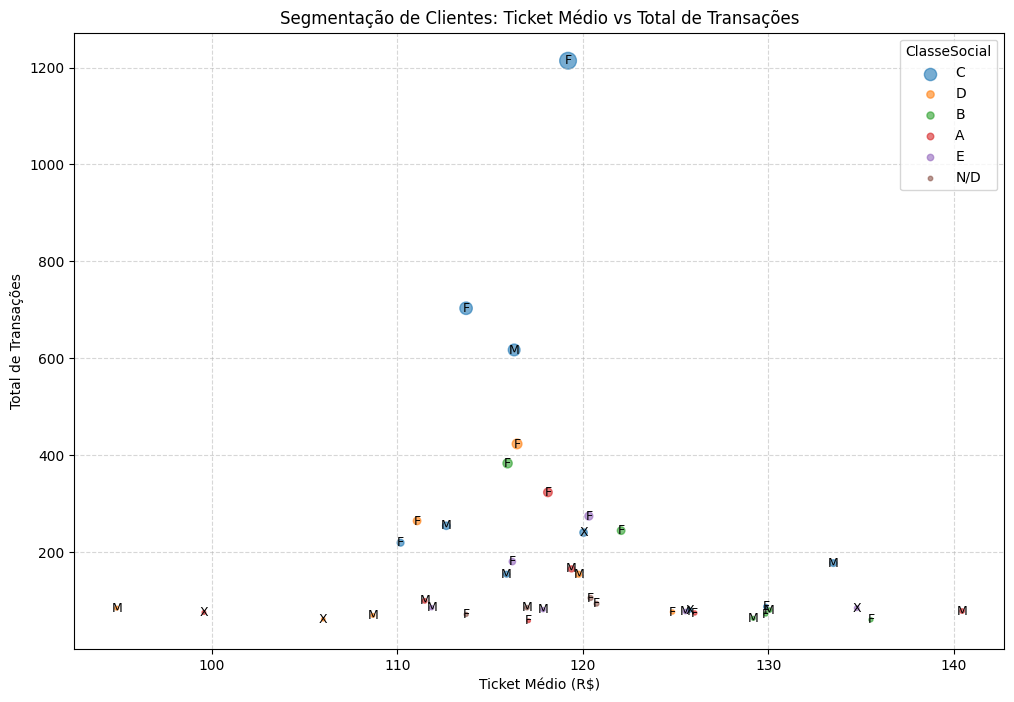

In [15]:
plt.figure(figsize=(12,8))
# Cria uma figura do gráfico com tamanho 12x8 polegadas

# Mapear cores por faixa etária para ficar visualmente mais intuitivo
faixas = segmentos_resumo['ClasseSocial'].unique()  # identifica todas as classes sociais
cores = plt.cm.tab10.colors  # seleciona uma paleta de cores do matplotlib

for i, faixa in enumerate(faixas):
    df_temp = segmentos_resumo[segmentos_resumo['ClasseSocial'] == faixa]  # filtra cada classe social
    plt.scatter(
        df_temp['Ticket_Medio'],            # eixo X: Ticket Médio
        df_temp['Total_Transacoes'],        # eixo Y: Total de Transações
        s=df_temp['Faturamento_Total']/1000,# tamanho do ponto proporcional ao faturamento
        alpha=0.6,                          # transparência para melhor visualização
        color=cores[i % len(cores)],        # cor diferente para cada classe social
        label=faixa                         # legenda para cada classe social
    )

plt.title('Segmentação de Clientes: Ticket Médio vs Total de Transações')
plt.xlabel('Ticket Médio (R$)')
plt.ylabel('Total de Transações')
plt.legend(title='ClasseSocial')  # adiciona legenda com título
plt.grid(True, linestyle='--', alpha=0.5)  # adiciona uma grade pontilhada

# Adiciona rótulos de gênero dentro das bolhas
for idx, row in segmentos_resumo.iterrows():
    plt.text(row['Ticket_Medio'], row['Total_Transacoes'], row['Genero'],
             fontsize=9, ha='center', va='center')  # posiciona o texto no centro da bolha

plt.show()  # mostra o gráfico

# Resumo:
# 1. Criamos um gráfico de dispersão (scatter plot) para comparar Ticket Médio vs Total de Transações.
# 2. Cada bolha representa um grupo de clientes; o tamanho da bolha mostra o faturamento total.
# 3. Diferentes cores representam classes sociais diferentes, tornando o gráfico mais intuitivo.
# 4. Adicionamos rótulos de gênero dentro das bolhas para identificar facilmente os grupos.
# 5. Em resumo: o gráfico ajuda a visualizar como os clientes se distribuem por ticket, transações, faturamento, classe social e gênero, tudo de forma clara e visual.

Quem mais gera faturamento são as mulheres jovens da classe C. Já os homens e clientes das classes A/B gastam mais em cada compra, mas compram com menos frequência.

## 5.3. Análise do Produto
**Objetivo**: Identificar produtos mais vendidos

In [16]:
# Agrupei os dados por categoria de produto e calculei métricas de resumo
categoria_resumo = (
    df_raw_fim.groupby('Descrição').agg(
        Unidades_Vendidas=('UnidadesVendidas','sum'),   # Soma todas as unidades vendidas por categoria
        Faturamento_Total=('ValorVendido','sum'),   # Soma todo o faturamento por categoria
        Ticket_Medio=('ValorVendido','mean')        # Calcula o ticket médio por categoria
    )
    .reset_index()  # Transforma o índice da categoria em uma coluna normal
    .sort_values(by='Faturamento_Total', ascending=False)  # Ordena do maior para o menor faturamento
)

# Visualização do resumo por categoria
categoria_resumo

# Resumo:
# 1. Primeiro agrupamos os dados pelo nome/descrição do produto usando groupby().
# 2. Depois aplicamos funções de agregação com .agg():
#    - sum() para total de unidades vendidas e faturamento total
#    - mean() para calcular o ticket médio
# 3. reset_index() transforma a coluna de categoria em uma coluna normal, não mais índice.
# 4. sort_values() organiza a tabela mostrando primeiro os produtos que geraram mais faturamento.
# 5. Em resumo: criamos um resumo por categoria de produto, mostrando quantidade vendida, faturamento e ticket médio, facilitando a análise de desempenho dos produtos.

,Descrição,Unidades_Vendidas,Faturamento_Total,Ticket_Medio
5,Preto - G,1938,162540.8920,197.979162
6,Preto - GG,1403,125705.1420,212.339767
8,Preto - P,1911,113144.1395,142.498916
4,Branco - P,1923,105347.4695,130.704056
2,Amarelo - P,1969,90043.1120,106.939563
9,Vermelho - G,912,80964.0030,213.063166
1,Amarelo - M,2023,71828.8420,84.604054
7,Preto - M,1985,57477.7035,69.501455
3,Branco - M,2002,55316.6370,67.131841
0,Amarelo - G,1473,37140.1755,58.304828


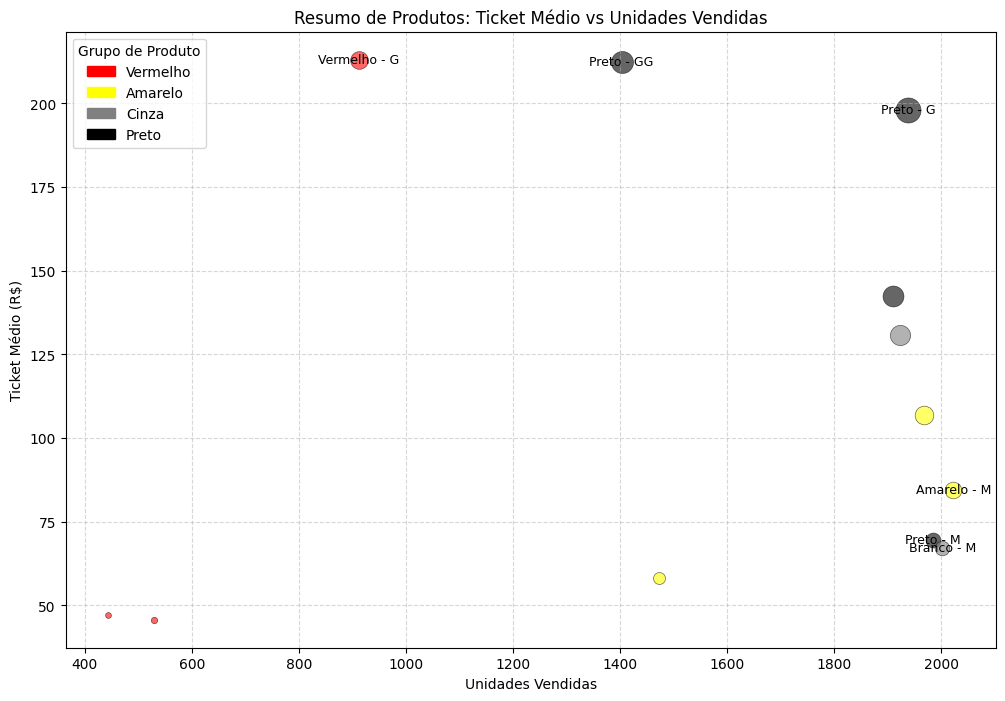

In [35]:
plt.figure(figsize=(12,8))
# Cria uma figura de gráfico com tamanho 12x8 polegadas

# Função para definir cores por grupo de produto
def cor_produto(descricao):
    if 'Vermelho' in descricao:
        return 'red'
    elif 'Amarelo' in descricao:
        return 'yellow'
    elif 'Preto' in descricao:
        return 'black'
    else:
        return 'gray'  # outros produtos

# Cria o gráfico de bolhas para cada produto
for idx, row in categoria_resumo.iterrows():  # percorre cada linha da tabela de resumo
    plt.scatter(
        row['Unidades_Vendidas'],         # eixo X: unidades vendidas
        row['Ticket_Medio'],              # eixo Y: ticket médio
        s=row['Faturamento_Total']/500,   # tamanho da bolha proporcional ao faturamento
        color=cor_produto(row['Descrição']), # cor definida pela função cor_produto()
        alpha=0.6,                        # transparência
        edgecolor='k',                     # contorno preto para destacar
        linewidth=0.5                      # espessura do contorno
    )

    # Adiciona rótulo apenas para produtos estratégicos (maior ticket ou maior venda)
    if row['Ticket_Medio'] > categoria_resumo['Ticket_Medio'].quantile(0.75) or \
       row['Unidades_Vendidas'] > categoria_resumo['Unidades_Vendidas'].quantile(0.75):
        plt.text(row['Unidades_Vendidas'], row['Ticket_Medio'], row['Descrição'],
                 fontsize=9, ha='center', va='center')  # posiciona texto no centro da bolha

plt.title('Resumo de Produtos: Ticket Médio vs Unidades Vendidas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Ticket Médio (R$)')
plt.grid(True, linestyle='--', alpha=0.5)  # adiciona grade pontilhada

# Cria legenda manual para cores
import matplotlib.patches as mpatches
legendas = [mpatches.Patch(color='red', label='Vermelho'),
            mpatches.Patch(color='yellow', label='Amarelo'),
            mpatches.Patch(color='gray', label='Cinza'),
            mpatches.Patch(color='black', label='Preto')]
plt.legend(handles=legendas, title='Grupo de Produto')  # adiciona legenda

plt.show()  # mostra o gráfico

# Resumo:
# 1. Criamos um gráfico de bolhas mostrando Ticket Médio vs Unidades Vendidas para cada produto.
# 2. O tamanho da bolha mostra o faturamento total, ajudando a identificar produtos mais valiosos.
# 3. As cores indicam grupos de produtos (Vermelho, Azul, Cinza, Outros) para facilitar a visualização.
# 4. Adicionamos rótulos apenas para produtos estratégicos (maior ticket ou maior venda).
# 5. Em resumo: o gráfico ajuda a entender rapidamente quais produtos vendem mais, geram mais faturamento e a qual grupo pertencem, de forma visual e clara.

Produtos pretos têm ticket médio mais alto, especialmente nos tamanhos G e GG, mas nem sempre vendem as maiores quantidades. Produtos amarelos vendem muitas unidades, mas com ticket médio menor. Produtos vermelhos têm ticket variável e vendem menos unidades.

##5.4. Análise de promoções
**Objetivo**: Medir impacto das promoções no faturamento

In [18]:
# Agrupei os dados por promoções e calculei métricas de resumo
promo_resumo = df_raw_fim.groupby('Promo').agg(
    Total_Transacoes=('TransactionID','nunique'),  # Conta o número de transações únicas por promoção
    Faturamento_Total=('ValorVendido','sum'),        # Soma o faturamento total gerado por cada promoção
    Ticket_Medio=('ValorVendido','mean')             # Calcula o ticket médio por promoção
).reset_index()  # Transforma o índice em coluna para ficar em formato de tabela

# Visualização do resumo por promoções
promo_resumo

# Resumo:
# 1. Primeiro agrupamos os dados pela coluna 'Promo', ou seja, cada promoção vira um grupo.
# 2. Depois aplicamos funções de agregação com .agg():
#    - 'nunique' conta transações únicas
#    - 'sum' calcula o faturamento total
#    - 'mean' calcula o ticket médio
# 3. reset_index() organiza o resultado em uma tabela normal, com cada promoção como linha.
# 4. Em resumo: criamos um resumo mostrando quantas transações, quanto faturamento e ticket médio cada promoção gerou, ajudando a analisar a performance de promoções.

,Promo,Total_Transacoes,Faturamento_Total,Ticket_Medio
0,0,6845,823249.110,120.270140
1,1,940,95435.413,101.527035


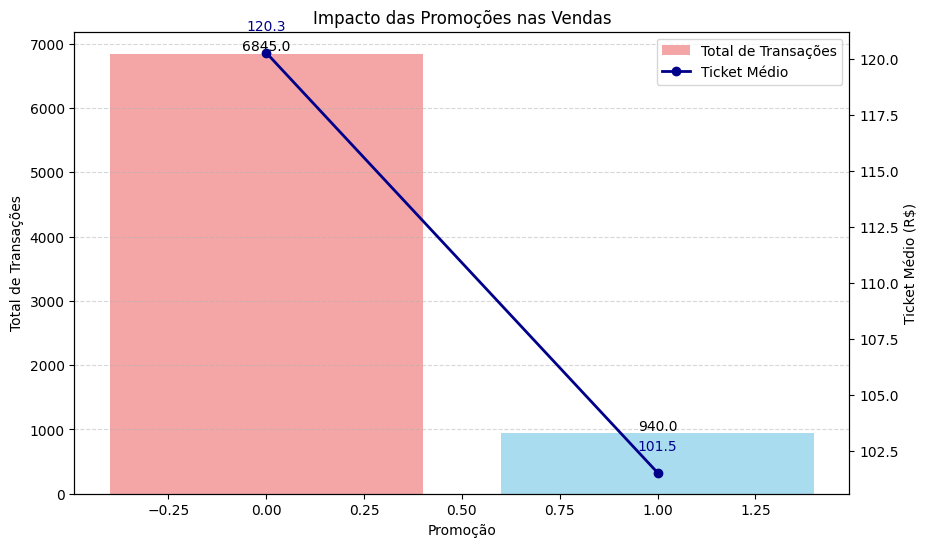

In [19]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Cria uma figura e um eixo principal para o gráfico, tamanho 10x6 polegadas

# Barras: Total de Transações
ax1.bar(
    promo_resumo['Promo'],                # eixo X: promoções
    promo_resumo['Total_Transacoes'],     # eixo Y: total de transações
    color=['lightcoral','skyblue'],       # cores diferentes para cada barra
    alpha=0.7,                            # transparência
    label='Total de Transações'           # legenda
)
ax1.set_xlabel('Promoção')
ax1.set_ylabel('Total de Transações')
ax1.set_title('Impacto das Promoções nas Vendas')
ax1.grid(axis='y', linestyle='--', alpha=0.5)  # grade horizontal pontilhada

# Linha: Ticket Médio
ax2 = ax1.twinx()  # cria um segundo eixo Y para a linha
ax2.plot(
    promo_resumo['Promo'],
    promo_resumo['Ticket_Medio'],
    color='darkblue',
    marker='o',
    linewidth=2,
    label='Ticket Médio'
)
ax2.set_ylabel('Ticket Médio (R$)')

# Legendas combinadas dos dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Adiciona valores acima das barras e pontos da linha
for i, row in promo_resumo.iterrows():
    ax1.text(i, row['Total_Transacoes'] + 50, row['Total_Transacoes'], ha='center')
    ax2.text(i, row['Ticket_Medio'] + 1, round(row['Ticket_Medio'],1), ha='center', color='darkblue')

plt.show()  # mostra o gráfico

# Resumo:
# 1. Criamos um gráfico misto com barras e linha para comparar duas métricas diferentes.
# 2. As barras mostram o total de transações por promoção.
# 3. A linha mostra o ticket médio de cada promoção, usando um eixo Y diferente.
# 4. Adicionamos valores acima das barras e pontos para facilitar a leitura.
# 5. Em resumo: o gráfico permite visualizar ao mesmo tempo o volume de vendas e a média de faturamento das promoções, facilitando a análise do impacto de cada promoção.

A maioria das vendas (6.845 transações) aconteceu sem promoção, gerando maior faturamento e ticket médio (120). As vendas com promoção foram poucas (940 transações), com faturamento menor e ticket médio mais baixo (101).

##5.5. Análise temporal
**Objetivo**: Detectar sazonalidade, picos de venda e tendências.

In [20]:
# Criei colunas derivadas para Ano-Mês e Dia da Semana
df_raw_fim['AnoMes'] = df_raw_fim['Date'].dt.to_period('M')  # converte a data para formato Ano-Mês (ex: 2025-09)
df_raw_fim['DiaSemana'] = df_raw_fim['Date'].dt.day_name()   # extrai o nome do dia da semana (ex: Monday)

# Agrupei os dados por mês, calculando métricas de resumo
tempo_mes = df_raw_fim.groupby('AnoMes').agg(
    Faturamento_Total=('ValorVendido','sum'),  # soma todo o faturamento no mês
    Transacoes=('TransactionID','nunique'), # conta transações únicas no mês
    Ticket_Medio=('ValorVendido','mean')       # calcula ticket médio no mês
).reset_index()  # transforma AnoMes em coluna normal

# Visualização do resumo por mês
tempo_mes

# Resumo:
# 1. Primeiro criamos colunas extras para facilitar a análise temporal: Ano-Mês e Dia da Semana.
# 2. Depois agrupamos os dados por mês usando groupby() e calculamos:
#    - Faturamento total (soma dos valores vendidos)
#    - Número de transações únicas
#    - Ticket médio (valor médio das vendas)
# 3. reset_index() organiza o resultado como uma tabela normal.
# 4. Em resumo: criamos um resumo mensal das vendas, que ajuda a entender a evolução do faturamento e do ticket médio ao longo do tempo.

,AnoMes,Faturamento_Total,Transacoes,Ticket_Medio
0,2022-01,48781.6630,444,109.868610
1,2022-02,33904.5910,313,108.321377
2,2022-03,67508.6450,613,110.128295
3,2022-04,48130.5820,447,107.674680
4,2022-05,51761.5960,456,113.512272
5,2022-06,33658.7540,302,111.452828
6,2022-07,48442.9700,457,106.002123
7,2022-08,50768.5340,486,104.462004
8,2022-09,39919.2780,358,111.506363
9,2023-01,47558.9180,378,125.817243


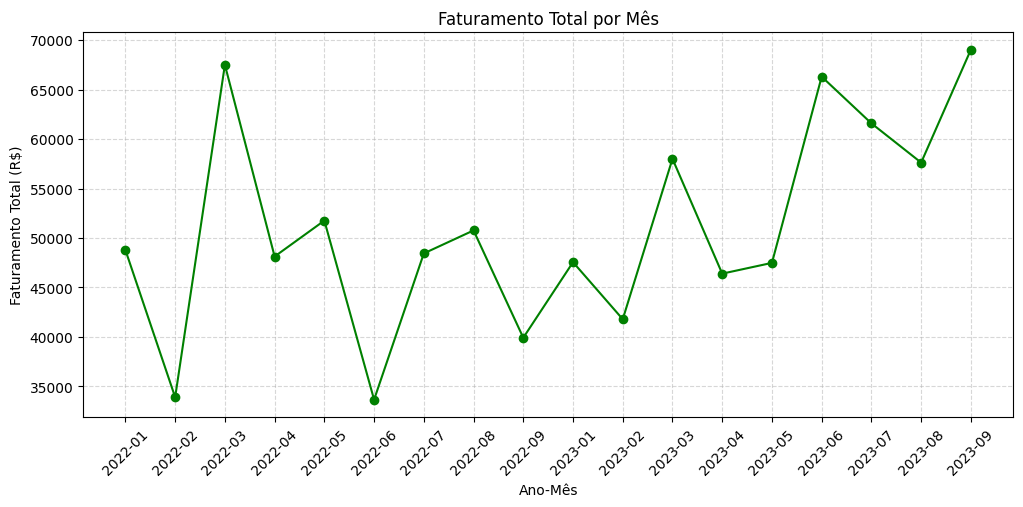

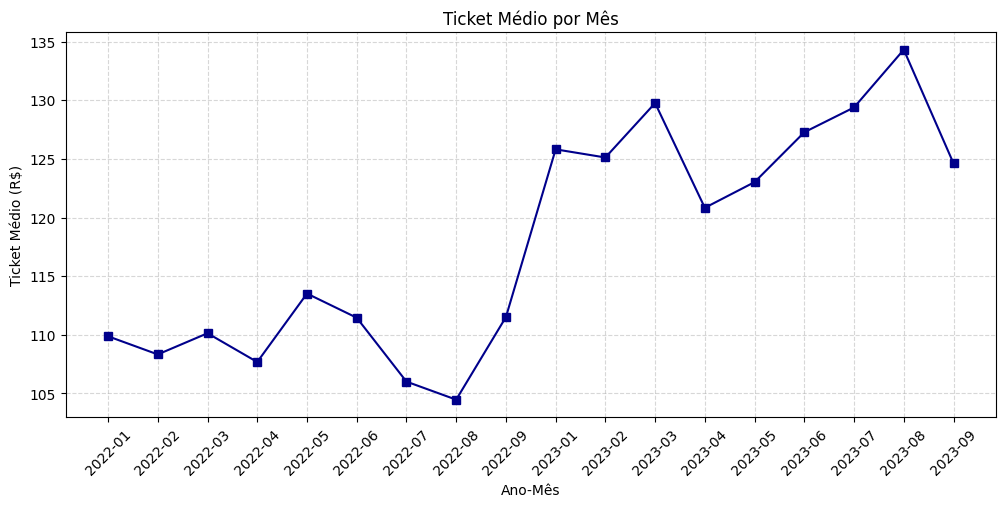

In [21]:
# Gráfico 1: Faturamento Total
plt.figure(figsize=(12,5))
# Cria um gráfico com tamanho 12x5 polegadas
plt.plot(
    tempo_mes['AnoMes'].astype(str),  # eixo X: Ano-Mês como texto
    tempo_mes['Faturamento_Total'],  # eixo Y: faturamento total
    marker='o',                       # marca cada ponto com círculo
    color='green'                     # cor da linha
)
plt.title('Faturamento Total por Mês')  # título do gráfico
plt.xlabel('Ano-Mês')                    # título eixo X
plt.ylabel('Faturamento Total (R$)')     # título eixo Y
plt.xticks(rotation=45)                  # rotaciona os labels do eixo X para melhor visualização
plt.grid(True, linestyle='--', alpha=0.5)  # adiciona grade pontilhada
plt.show()  # mostra o gráfico

# Gráfico 2: Ticket Médio
plt.figure(figsize=(12,5))
plt.plot(
    tempo_mes['AnoMes'].astype(str),  # eixo X: Ano-Mês
    tempo_mes['Ticket_Medio'],        # eixo Y: ticket médio
    marker='s',                        # marca cada ponto com quadrado
    color='darkblue'                   # cor da linha
)
plt.title('Ticket Médio por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Ticket Médio (R$)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Resumo:
# 1. Criamos dois gráficos de linha para visualizar a evolução ao longo do tempo.
# 2. O primeiro mostra o faturamento total mês a mês.
# 3. O segundo mostra o ticket médio mês a mês.
# 4. Marcadores nos pontos ajudam a identificar cada mês e a grade facilita a leitura.
# 5. Em resumo: esses gráficos ajudam a ver tendências e comparar desempenho mensal de forma visual.

O faturamento cresceu ao longo do tempo, com alguns picos claros em março 2022, março 2023 e setembro 2023. O ticket médio também aumentou em 2023, chegando a R$ 134, mesmo quando o número de transações não subiu tanto, indicando que os clientes estão gastando mais por compra.

In [22]:
# Agrupei os dados por dia da semana e calculei métricas de resumo
tempo_dia = (
    df_raw_fim.groupby('DiaSemana').agg(
        Faturamento_Total=('ValorVendido','sum'),  # soma todo o faturamento por dia da semana
        Transacoes=('TransactionID','nunique'), # conta transações únicas por dia
        Ticket_Medio=('ValorVendido','mean')       # calcula ticket médio por dia
    )
    .reset_index()  # transforma DiaSemana em coluna normal
    .sort_values(by='Faturamento_Total', ascending=False)  # organiza do maior para o menor faturamento
)

# Visualização do resumo por dia da semana
tempo_dia

# Resumo:
# 1. Primeiro agrupamos os dados pelo dia da semana usando groupby().
# 2. Depois aplicamos funções de agregação com .agg():
#    - sum() para faturamento total
#    - nunique() para contar transações únicas
#    - mean() para calcular ticket médio
# 3. reset_index() organiza o resultado como uma tabela normal.
# 4. sort_values() organiza os dias da semana do maior para o menor faturamento.
# 5. Em resumo: criamos um resumo diário das vendas, ajudando a entender quais dias têm mais faturamento, transações e ticket médio.

,DiaSemana,Faturamento_Total,Transacoes,Ticket_Medio
2,Saturday,150661.8740,1249,120.626000
4,Thursday,146119.4510,1235,118.315345
6,Wednesday,144156.1535,1232,117.009865
3,Sunday,130897.4830,1126,116.249985
1,Monday,120012.7190,1041,115.285993
5,Tuesday,114800.8810,978,117.383314
0,Friday,112035.9615,924,121.251041


Os fins de semana e quinta-feira geram mais faturamento, com sábado liderando (150.661), enquanto sexta-feira tem o menor faturamento (112.036), mesmo com ticket médio relativamente alto. Ou seja, o volume de vendas pesa mais que o ticket médio para o faturamento diário.

## 5.6. Análise por localização
**Objetivo**: Entender onde o faturamento é maior e comparar o desempenho por região.

In [23]:
# Agrupei os dados por loja e UF, calculando métricas de resumo
loja_resumo = (
    df_raw_fim.groupby(['LojaID','UF']).agg(
        Faturamento_Total=('ValorVendido','sum'),  # soma todo o faturamento por loja e UF
        Ticket_Medio=('ValorVendido','mean'),      # calcula o ticket médio por loja e UF
        Transacoes=('TransactionID','nunique')  # conta transações únicas por loja e UF
    )
    .reset_index()  # transforma StoreID e UF em colunas normais
    .sort_values(by='Faturamento_Total', ascending=False)  # organiza do maior para o menor faturamento
)

# Visualização do resumo por loja
loja_resumo

# Resumo:
# 1. Agrupamos os dados por loja (StoreID) e estado (UF) usando groupby().
# 2. Calculamos métricas importantes para cada grupo:
#    - Faturamento total com sum()
#    - Ticket médio com mean()
#    - Número de transações com nunique()
# 3. reset_index() transforma os índices em colunas normais para facilitar a visualização.
# 4. sort_values() organiza as lojas do maior para o menor faturamento.
# 5. Em resumo: criamos um resumo por loja mostrando faturamento, ticket médio e número de transações, ajudando a identificar as lojas com melhor desempenho.

,LojaID,UF,Faturamento_Total,Ticket_Medio,Transacoes
2,3,BA,109394.3055,118.008960,927
8,9,MG,105522.0740,116.857225,903
1,2,BA,104402.9255,118.102857,884
3,4,BA,104097.1635,120.762371,862
7,8,SP,100218.3820,119.735223,837
4,5,SP,98290.2945,120.898271,813
5,6,SP,97873.6325,116.239469,842
6,7,SP,97838.8455,114.699702,853
9,10,MG,51767.0020,118.459959,437
0,1,BA,49279.8980,115.409597,427


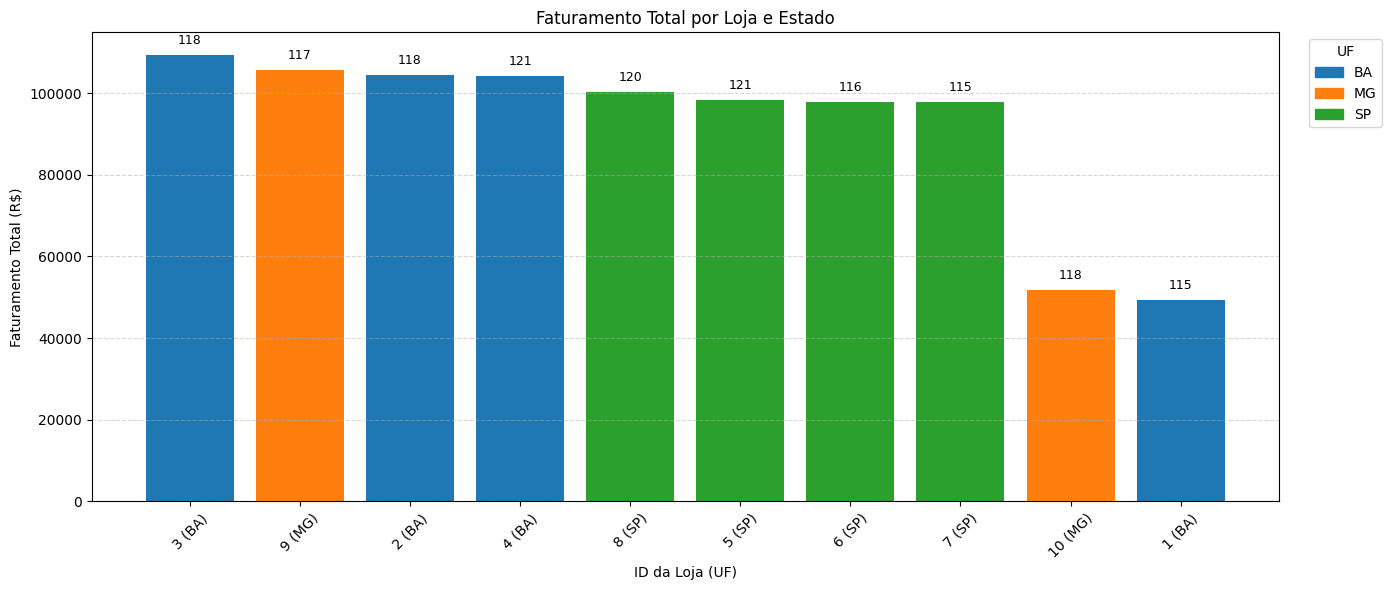

In [24]:
# Definir cores por UF
ufs = loja_resumo['UF'].unique()  # identifica todos os estados presentes
cores = ['tab:blue', 'tab:orange', 'tab:green']  # cores para os 3 estados
cores_dict = {uf: cores[i % len(cores)] for i, uf in enumerate(ufs)}  # cria um dicionário UF -> cor

plt.figure(figsize=(14,6))  # cria figura grande
bars = plt.bar(
    loja_resumo['LojaID'].astype(str) + ' (' + loja_resumo['UF'] + ')',  # rótulo do eixo X: loja + UF
    loja_resumo['Faturamento_Total'],                                     # altura das barras = faturamento
    color=[cores_dict[uf] for uf in loja_resumo['UF']]                    # cor de cada barra de acordo com o estado
)

plt.title('Faturamento Total por Loja e Estado')
plt.xlabel('ID da Loja (UF)')
plt.ylabel('Faturamento Total (R$)')
plt.xticks(rotation=45)  # rotaciona rótulos do eixo X
plt.grid(axis='y', linestyle='--', alpha=0.5)  # grade horizontal pontilhada

# Adicionar ticket médio como anotação acima de cada barra
for bar, ticket in zip(bars, loja_resumo['Ticket_Medio']):
    plt.text(
        bar.get_x() + bar.get_width()/2,  # posição horizontal central da barra
        bar.get_height() + 2000,          # posição vertical um pouco acima da barra
        f'{ticket:.0f}',                  # exibe o ticket médio arredondado
        ha='center', va='bottom', fontsize=9
    )

# Criar legenda para UF
legendas = [mpatches.Patch(color=cores_dict[uf], label=uf) for uf in ufs]
plt.legend(handles=legendas, title='UF', bbox_to_anchor=(1.02,1), loc='upper left')  # legenda fora do gráfico

plt.tight_layout()  # ajusta layout para não cortar nada
plt.show()  # exibe o gráfico

# Resumo:
# 1. Criamos um gráfico de barras mostrando o faturamento total por loja e estado.
# 2. Cada barra representa uma loja, e a cor indica o estado (UF).
# 3. Adicionamos o ticket médio acima de cada barra para facilitar a interpretação.
# 4. A legenda mostra quais cores correspondem a cada UF.
# 5. Em resumo: esse gráfico ajuda a comparar rapidamente o faturamento das lojas, identificar os estados e ver o ticket médio de cada loja de forma visual e clara.

As lojas com maior faturamento estão principalmente em BA e MG, com destaque para a loja 3 na BA. As lojas menores em faturamento estão em MG e BA, mostrando que o desempenho varia bastante por estado e unidade, mesmo com ticket médio relativamente parecido. O estado de SP continua apresentando o desempenho mais uniforme entre suas unidades, considerando a média por loja.

In [25]:
# Agrupei os dados por UF, calculando métricas de resumo
uf_resumo = df_raw_fim.groupby('UF').agg(
    Faturamento_Total=('ValorVendido','sum'),  # soma todo o faturamento por estado
    Ticket_Medio=('ValorVendido','mean')       # calcula o ticket médio por estado
).reset_index()  # transforma UF em coluna normal

# Visualização do resumo por estado
uf_resumo

# Resumo:
# 1. Primeiro agrupamos os dados pelo estado (UF) usando groupby().
# 2. Calculamos métricas importantes para cada estado:
#    - Faturamento total com sum()
#    - Ticket médio com mean()
# 3. reset_index() organiza o resultado como uma tabela normal, facilitando a visualização.
# 4. Em resumo: criamos um resumo por estado mostrando quanto cada UF faturou e qual foi o ticket médio, ajudando a identificar quais regiões têm melhor desempenho nas vendas.

,UF,Faturamento_Total,Ticket_Medio
0,BA,367174.2925,118.443320
1,MG,157289.0760,117.379907
2,SP,394221.1545,117.853858


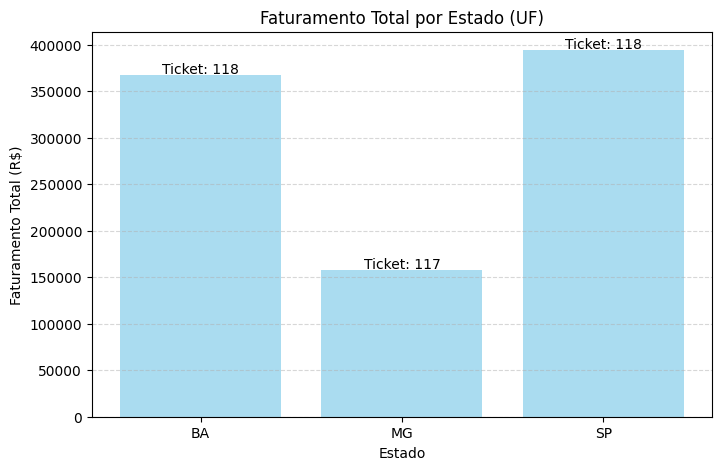

In [26]:
plt.figure(figsize=(8,5))  # cria uma figura de 8x5 polegadas

# Cria gráfico de barras com faturamento por estado
plt.bar(
    uf_resumo['UF'],                     # eixo X: estados
    uf_resumo['Faturamento_Total'],      # eixo Y: faturamento total
    color='skyblue',                     # cor das barras
    alpha=0.7                             # transparência
)

plt.title('Faturamento Total por Estado (UF)')  # título do gráfico
plt.xlabel('Estado')                            # rótulo do eixo X
plt.ylabel('Faturamento Total (R$)')           # rótulo do eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.5)  # adiciona grade horizontal pontilhada

# Adiciona ticket médio como anotação acima de cada barra
for i, row in enumerate(uf_resumo['UF']):
    plt.text(
        i,                                           # posição horizontal
        uf_resumo.loc[i, 'Faturamento_Total'] + 2000,  # posição vertical acima da barra
        f'Ticket: {uf_resumo.loc[i,"Ticket_Medio"]:.0f}', # exibe ticket médio arredondado
        ha='center'                                 # centraliza horizontalmente
    )

plt.show()  # exibe o gráfico

# Resumo:
# 1. Criamos um gráfico de barras mostrando o faturamento total por estado (UF).
# 2. As barras mostram o valor total vendido em cada estado.
# 3. Adicionamos o ticket médio acima de cada barra para facilitar a leitura.
# 4. Em resumo: esse gráfico ajuda a comparar rapidamente o desempenho de cada estado, mostrando faturamento e ticket médio de forma visual.

O SP lidera o faturamento total (394.221), seguido por BA (367.174) e MG (157.289). O ticket médio é parecido entre os estados (cerca de 117–118), indicando que o faturamento maior vem principalmente do volume de vendas, não do valor por transação.

In [27]:
# Agrupei os dados por região, calculando métricas de resumo
regiao_resumo = df_raw_fim.groupby('Regiao').agg(
    Faturamento_Total=('ValorVendido','sum'),  # soma todo o faturamento por região
    Ticket_Medio=('ValorVendido','mean')       # calcula o ticket médio por região
).reset_index()  # transforma a coluna Regiao em coluna normal

# Visualização do resumo por região
regiao_resumo

# Resumo:
# 1. Primeiro agrupamos os dados pela coluna 'Regiao' usando groupby().
# 2. Calculamos métricas importantes para cada região:
#    - Faturamento total com sum()
#    - Ticket médio com mean()
# 3. reset_index() organiza o resultado como uma tabela normal, facilitando a visualização.
# 4. Em resumo: criamos um resumo por região mostrando quanto cada região faturou e qual foi o ticket médio, ajudando a identificar as regiões com melhor desempenho nas vendas.

,Regiao,Faturamento_Total,Ticket_Medio
0,NORDESTE,367174.2925,118.443320
1,SUDESTE,551510.2305,117.718299


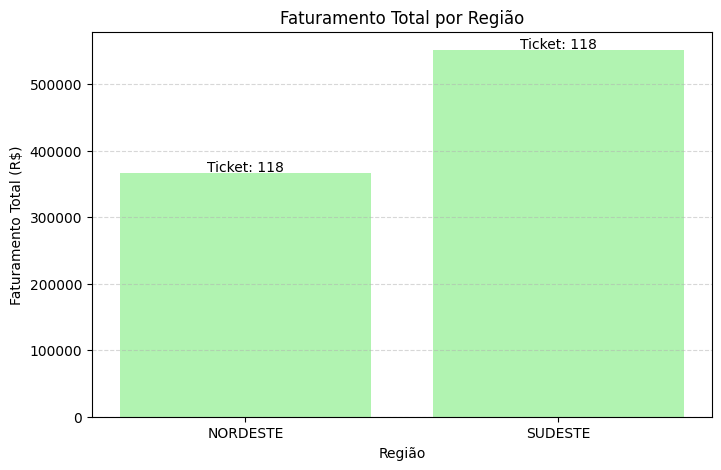

In [28]:
plt.figure(figsize=(8,5))  # cria uma figura de 8x5 polegadas

# Cria gráfico de barras mostrando faturamento por região
plt.bar(
    regiao_resumo['Regiao'],              # eixo X: regiões
    regiao_resumo['Faturamento_Total'],   # eixo Y: faturamento total
    color='lightgreen',                   # cor das barras
    alpha=0.7                             # transparência das barras
)

plt.title('Faturamento Total por Região')  # título do gráfico
plt.xlabel('Região')                        # rótulo do eixo X
plt.ylabel('Faturamento Total (R$)')       # rótulo do eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.5)  # adiciona grade horizontal pontilhada

# Adiciona ticket médio como anotação acima de cada barra
for i, row in enumerate(regiao_resumo['Regiao']):
    plt.text(
        i,                                           # posição horizontal central da barra
        regiao_resumo.loc[i, 'Faturamento_Total'] + 2000,  # posição vertical acima da barra
        f'Ticket: {regiao_resumo.loc[i,"Ticket_Medio"]:.0f}', # exibe ticket médio arredondado
        ha='center'                                 # centraliza horizontalmente
    )

plt.show()  # exibe o gráfico

# Resumo:
# 1. Criamos um gráfico de barras mostrando o faturamento total por região.
# 2. As barras mostram quanto cada região faturou.
# 3. Adicionamos o ticket médio acima de cada barra para facilitar a leitura.
# 4. Em resumo: esse gráfico ajuda a comparar rapidamente o desempenho de cada região, mostrando faturamento e ticket médio de forma visual e clara.

A região Sudeste gera mais faturamento (551.510), enquanto a região Nordeste vem depois (367.174). O ticket médio é parecido entre as duas regiões (118), indicando que o faturamento maior do Sudeste vem principalmente do volume de vendas.

##5.7. Correlações
**Objetivo**: Identificar padrões entre variáveis e insights estratégicos.

In [29]:
# Calculei a correlação entre as colunas numéricas UnitsSold, ValueSold e Promo
correlacoes = df_raw_fim[['UnidadesVendidas','ValorVendido','Promo']].corr()
# .corr() calcula a correlação de Pearson entre as colunas selecionadas
# Retorna valores entre -1 e 1:
# - 1: correlação positiva perfeita
# - 0: sem correlação
# - -1: correlação negativa perfeita

# Visualização da matriz de correlação
correlacoes

# Resumo para quem está aprendendo Python:
# 1. A correlação mede o quanto duas variáveis mudam juntas.
# 2. Aqui estamos vendo se o número de unidades vendidas (UnitsSold), o valor vendido (ValueSold) e a promoção (Promo) têm relação entre si.
# 3. O resultado é uma tabela mostrando a correlação de cada coluna com as outras.
# 4. Em resumo: a matriz de correlação ajuda a entender quais variáveis estão relacionadas, o que é útil para análise de vendas e decisões estratégicas.

,UnidadesVendidas,ValorVendido,Promo
UnidadesVendidas,1.000000,0.591740,-0.005453
ValorVendido,0.591740,1.000000,-0.082412
Promo,-0.005453,-0.082412,1.000000


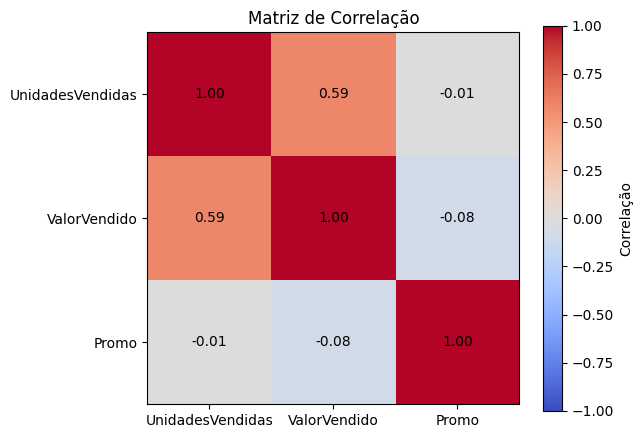

In [30]:
# Matriz de correlação
corr = correlacoes.values    # pega os valores numéricos da matriz de correlação
labels = correlacoes.columns # pega os nomes das colunas

plt.figure(figsize=(6,5))   # cria uma figura de 6x5 polegadas
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)  # plota a matriz com cores representando correlação (-1 a 1)
plt.colorbar(label='Correlação')                   # adiciona barra de cores
plt.xticks(range(len(labels)), labels)            # rótulos do eixo X
plt.yticks(range(len(labels)), labels)            # rótulos do eixo Y

# Adiciona os valores da correlação dentro das células
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f'{corr[i,j]:.2f}', ha='center', va='center', color='black')

plt.title('Matriz de Correlação')
plt.show()  # exibe o gráfico

# Resumo para quem está aprendendo Python:
# 1. Esse gráfico mostra visualmente a correlação entre as variáveis UnidadesVendidas, ValorVendido e Promo.
# 2. Cores quentes (vermelho) indicam correlação positiva; cores frias (azul) indicam correlação negativa.
# 3. Os números dentro da matriz mostram exatamente o valor da correlação.
# 4. Em resumo: essa matriz ajuda a identificar rapidamente quais variáveis estão mais relacionadas, facilitando análises estratégicas.

Essa matriz mostra a correlação entre as variáveis:

1. UnitsSold e ValueSold (0.59) → relação moderada: mais unidades vendidas tendem a gerar mais faturamento.

2. Promo com as outras variáveis (~0) → quase sem relação: ter promoção não influencia diretamente no número de unidades vendidas nem no valor vendido.

In [31]:
# Calculei o ticket médio por faixa de idade
ticket_idade = df_raw_fim.groupby('Faixa de Idade')['ValorVendido'].mean().reset_index()
# groupby('Faixa de Idade') agrupa os dados por faixa etária
# mean() calcula a média de ValorVendido para cada faixa
# reset_index() organiza o resultado como uma tabela normal

# Visualizei o ticket médio por faixa de idade
ticket_idade

# Resumo para quem está aprendendo Python:
# 1. Agrupamos os dados pela faixa etária usando groupby().
# 2. Calculamos a média de vendas (ticket médio) em cada faixa usando mean().
# 3. reset_index() transforma a faixa de idade em coluna normal para facilitar a visualização.
# 4. Em resumo: essa tabela mostra quanto, em média, cada faixa etária gasta, ajudando a entender o comportamento de compra por idade.


,Faixa de Idade,ValorVendido
0,18-25,117.663814
1,25-35,118.953524
2,35-45,116.169341
3,45+,119.365613


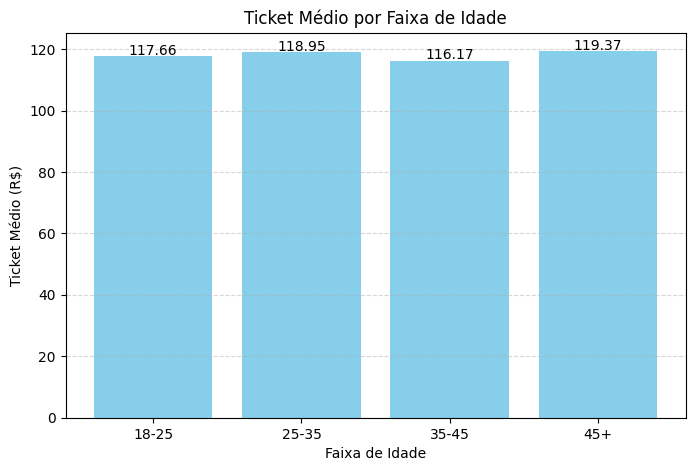

In [32]:
plt.figure(figsize=(8,5))  # cria uma figura de 8x5 polegadas

# Cria gráfico de barras mostrando ticket médio por faixa de idade
plt.bar(
    ticket_idade['Faixa de Idade'],  # eixo X: faixas etárias
    ticket_idade['ValorVendido'],       # eixo Y: ticket médio
    color='skyblue'                  # cor das barras
)

plt.title('Ticket Médio por Faixa de Idade')  # título do gráfico
plt.xlabel('Faixa de Idade')                  # rótulo do eixo X
plt.ylabel('Ticket Médio (R$)')              # rótulo do eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.5) # adiciona grade horizontal pontilhada

# Adiciona valores acima de cada barra
for i, valor in enumerate(ticket_idade['ValorVendido']):
    plt.text(
        i,            # posição horizontal central da barra
        valor + 0.5,  # posição vertical acima da barra
        f'{valor:.2f}', # exibe valor do ticket médio com 2 casas decimais
        ha='center'    # centraliza horizontalmente
    )

plt.show()  # exibe o gráfico

# Resumo:
# 1. Criamos um gráfico de barras mostrando o ticket médio por faixa de idade.
# 2. Cada barra representa uma faixa etária e a altura indica o valor médio gasto.
# 3. Adicionamos os valores do ticket médio no topo das barras para facilitar a leitura.
# 4. Em resumo: esse gráfico ajuda a visualizar rapidamente qual faixa etária gasta mais, facilitando análises de comportamento do cliente.

Os clientes de 45+ têm o ticket médio mais alto (119,37), seguidos pelos 25-35 anos (118,95). As faixas mais jovens (18-25 e 35-45) compram um pouco menos por transação (116–117).

# 6. Insights

##6.1. Compilar informações obtidas nas análises
**Objetivo**: Ter clareza das informações e um panorama geral do base que estou analisando.

Informações obtidas durante cada análise

* **5.1. Estatísticas descritivas básicas:**
Em média, cada transação vende 2 unidades e fatura 118, com a mediana em 2 unidades e 93,48. A maioria das vendas segue esse padrão, mas algumas transações maiores elevam a média. Os valores variam de 1 a 4 unidades e de 16,99 a 367,96, mostrando a dispersão típica das vendas.


* **5.2. Análise do Perfil do cliente:**
Quem mais gera faturamento são as mulheres jovens da classe C. Já os homens e clientes das classes A/B gastam mais em cada compra, mas compram com menos frequência.

* **5.3. Análise do Produto:**
Produtos pretos têm ticket médio mais alto, especialmente nos tamanhos G e GG, mas nem sempre vendem as maiores quantidades. Produtos amarelos vendem muitas unidades, mas com ticket médio menor. Produtos vermelhos têm ticket variável e vendem menos unidades.

* **5.4. Análise de promoções:**
A maioria das vendas (6.845 transações) aconteceu sem promoção, gerando maior faturamento e ticket médio (120). As vendas com promoção foram poucas (940 transações), com faturamento menor e ticket médio mais baixo (101).

* **5.5. Análise temporal:**
O faturamento cresceu ao longo do tempo, com alguns picos claros em março 2022, março 2023 e setembro 2023. O ticket médio também aumentou em 2023, chegando a R$ 134, mesmo quando o número de transações não subiu tanto, indicando que os clientes estão gastando mais por compra.

* Os fins de semana e quinta-feira geram mais faturamento, com sábado liderando (150.661), enquanto sexta-feira tem o menor faturamento (112.036), mesmo com ticket médio relativamente alto. Ou seja, o volume de vendas pesa mais que o ticket médio para o faturamento diário.

* **5.6. Análise por localização:**
As lojas com maior faturamento estão principalmente em BA e MG, com destaque para a loja 3 na BA. As lojas menores em faturamento estão em MG e BA, mostrando que o desempenho varia bastante por estado e unidade, mesmo com ticket médio relativamente parecido. O estado de SP continua apresentando o desempenho mais uniforme entre suas unidades, considerando a média por loja.

* **5.7. Correlações:**
Essa matriz mostra a correlação entre as variáveis:
UnitsSold e ValueSold (0.59) → relação moderada: mais unidades vendidas tendem a gerar mais faturamento.
Promo com as outras variáveis (~0) → quase sem relação: ter promoção não influencia diretamente no número de unidades vendidas nem no valor vendido.
Os clientes de 45+ têm o ticket médio mais alto (119,37), seguidos pelos 25-35 anos (118,95). As faixas mais jovens (18-25 e 35-45) compram um pouco menos por transação (116–117).




##6.2. Quais **insights estratégicos** esta análise me traz?
**Objetivo**: Transformar o conhecimento obtido em ação.

**Insights de Negócio**
<br><br>
**1. Quem compra mais**

* As mulheres jovens da classe C compram com mais frequência e em maior volume, são o público que mais movimenta as vendas.

* Homens e clientes das classes A/B gastam mais em cada compra, mas aparecem menos vezes, aqui vale investir em retenção e relacionamento.
* **Sugestão de ação:** criar campanhas diferentes para cada grupo: atração para mulheres jovens e fidelização para homens e classes A/B.

**2. Promoções não trazem resultado**

* 88% das vendas aconteceram sem promoção e, mesmo assim, o ticket médio foi 19% maior.

* Promoções não aumentaram o número de vendas nem o faturamento.
* **Sugestão de ação:** reduzir promoções e trabalhar mais o valor percebido do produto (ex.: exclusividade, qualidade, experiência).

**3. Quando vender mais**

* Há picos de faturamento em março e setembro, meses estratégicos para reforçar campanhas.

* Sexta-feira é o dia mais fraco em vendas, enquanto sábado é o mais forte.

* O ticket médio vem crescendo, mostrando que os clientes estão dispostos a gastar mais por compra.
* **Sugestão de ação:** planejar campanhas sazonais e criar ações específicas para aumentar as vendas às sextas.

**4. Quais produtos apostar**

* Produtos pretos (tamanhos G, GG e P): vendem menos que os cinzas, mas cada venda gera bastante faturamento, perfil de produto premium.

* Produtos amarelos: vendem muito, mas com menor valor por venda, perfil de produto popular.
* **Sugestão de ação:** manter o equilíbrio entre produtos premium (margem alta) e populares (volume alto) para otimizar resultados.

**5. Onde vender mais**

* As lojas de maior faturamento estão em BA e MG, com destaque para a loja 3 da BA, que sozinha puxou grande parte das vendas.
* Porém, mesmo dentro do mesmo estado há variação forte: algumas lojas do BA e MG ficaram entre as menores em faturamento, apesar de ticket médio parecido.

* **Sugestão de ação:** entender o que as lojas que vendem mais estão fazendo de diferente (como produtos, equipe ou promoções) e aplicar essas mesmas práticas nas lojas que vendem menos, para equilibrar os resultados entre todas. Outro exemplo seria avaliar quais ações no estado de SP mantém as lojas com faturamento equilibrado.